# CLASSIFICATION HACKATHON

© Explore Data Science Academy

## Honour Code

I **Boitumelo Lefophana** confirm, by submitting this document, that the solutions in this notebook are a result of my own work and that I abide by the   <a href="https://drive.google.com/open?id=1FXCIf425JLRx3JQi-ltSWppj8BCF3Np1" target="_blank">EDSA Student Manifesto</a>. Non-compliance with the honour code constitutes a material breach of contract.

## Import required packages for coding challenge

- This code imports several libraries and modules commonly used in machine learning tasks.
- These imports set the stage for performing various machine learning tasks, such as data preprocessing, model training, and evaluation using different classifiers and evaluation metrics.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import time
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

<a id="two"></a>
# Step 2: Load the Dataset
<a class="anchor" id="1.1"></a>
<a href=#cont>

- This code snippet reads data from CSV files using pandas library in Python.
- These DataFrames, <b>train_df, test_df, and sample</b>, hold the data from the respective CSV files, allowing further exploration, preprocessing, model training, or other analyses to be performed on the data.

In [2]:
train_df = pd.read_csv('https://raw.githubusercontent.com/BoitumelopPrecious/Hackathon-repo/main/train_set.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/BoitumelopPrecious/Hackathon-repo/main/test_set.csv')
sample = pd.read_csv('sample_submission.csv')

# Step 3: Exploratory Data Analysis (EDA)

- This function is used to get a quick glimpse of the dataset's contents, column names, and data types before performing further analysis or preprocessing.
- This method in pandas is helpful for quickly previewing the contents of a DataFrame and understanding its structure.

In [3]:
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


- This function is helpful for understanding the size of the dataset and is often used in data preprocessing or exploratory data analysis to check the structure and dimensions of the data before performing operations or training machine learning models.
- It returns a tuple containing the number of rows and columns present in the DataFrame.

In [4]:
train_df.shape

(33000, 2)

In [5]:
test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [6]:
test_df.shape

(5682, 2)

The <b>df.info()</b> method in pandas provides a concise summary of the DataFrame, including information about the columns, data types, and memory usage. It gives details such as:

- The column names present in the DataFrame.
- The number of non-null values in each column.
- The data type of each column (e.g., integer, float, object, etc.).
- The memory usage of the DataFrame.

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


- The code <b>.str.len()</b> adds a new column named 'length' to the DataFrame train. This new column contains the length of the text present in each row of the 'text' column.

In [8]:
train_df['length'] = train_df['text'].str.len()

In [9]:
train_df.head()

,lang_id,text,length
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,220
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,252
2,eng,the province of kwazulu-natal department of tr...,264
3,nso,o netefatša gore o ba file dilo ka moka tše le...,217
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,239


### South African languages distribution
- This code  generates a pie chart representing the distribution of South African languages based on their frequencies within the 'lang_id' column of the train DataFrame.

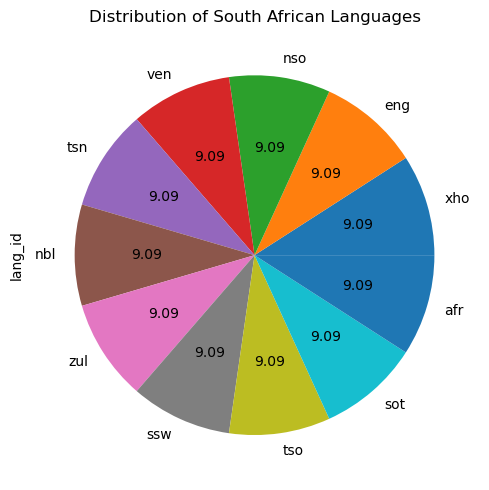

In [10]:
import matplotlib.pyplot as plt

# Create a figure and plot the pie chart
plt.figure(figsize=(5, 5))  # Set the figure size as needed
count_data = train_df['lang_id'].value_counts()
count_data.plot(kind='pie', autopct='%.2f')
plt.title("Distribution of South African Languages")

# Display the pie chart
plt.tight_layout()
plt.show()

### The distribution of text lengths for different language

- This code segment visualizes the distribution of text lengths across different language classes using a box plot, facilitating comparisons of text length distributions among various 'lang_id' categories. 

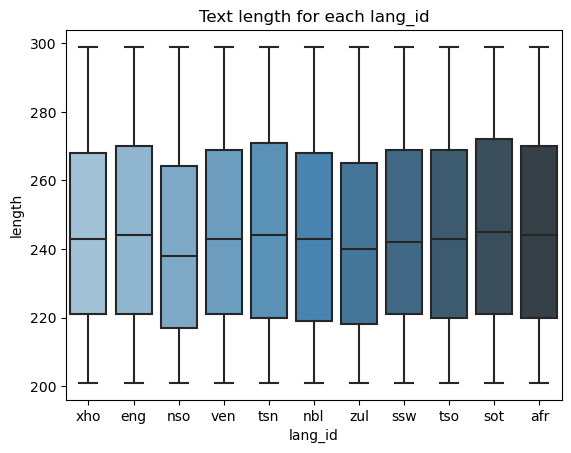

In [11]:
import seaborn as sns
# Plot the distribution of the text length for each class using a box plot
sns.boxplot(x=train_df['lang_id'], y=train_df['length'], data=train_df, palette=("Blues_d"))
plt.title('Text length for each lang_id')
plt.show()

# Step 3: Data Preprocessing

### Create copy
- The first step in the preprocessing is to create a copy of the train dataframe for the EDA. The original dataframe will therefore be preserved. We proceed to rename the classes, converting the labels from numbers to the words they represent. This will make creating visuals with appropriate labels easier.

In [12]:
# Create a copy of the train_df DataFrame
train = train_df.copy()
# Create a copy of the test_df DataFrame
test = test_df.copy()

In [13]:
# Assuming 'train' and 'test' are your Pandas DataFrames with a 'text' column
train['text'] = train['text'].str.lower()
test['text'] = test['text'].str.lower()

In [14]:
train.head()

,lang_id,text,length
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,220
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,252
2,eng,the province of kwazulu-natal department of tr...,264
3,nso,o netefatša gore o ba file dilo ka moka tše le...,217
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,239


- This Python function, preprocess_data, takes in two dataframes (train and test) containing text data. Its purpose is to preprocess this text data using <b>TF-IDF vectorization</b>.
- This function encapsulates the <b>TF-IDF vectorization</b> process, allowing easy preprocessing of text data by returning the transformed features for both the training and test datasets along with the trained vectorizer.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
def preprocess_data(train, test):
    # Initializing the TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Fitting the vectorizer on the training data
    vectorizer.fit(train['text'])

    # Transforming the training and test data using the fitted vectorizer
    train_variables = vectorizer.transform(train['text'])
    test_variables = vectorizer.transform(test['text'])

    return train_variables, test_variables, vectorizer

- The the returned values of the preprocess_data function to these variables to store the TF-IDF features of the training and the test data, as well as the fitted vectorizer, which will allow them to be used in the follwing steps for model training and prediction.

In [16]:
train_variables, test_variables, vectorizer = preprocess_data(train, test)

<a id="five"></a>
# Step 4: Split the Dataset into Training and Testing Sets
<a class="anchor" id="1.1"></a>
<a href=#cont>

- x contains the features (TF-IDF features) derived from the training text data.
- y contains the target variable ('lang_id') from the training dataset.
- testX contains the features derived from the test text data.
- The <b>train_test_split</b> function then splits the training data (x and y) into <b>80% training</b> (x_train and y_train) and <b>20% testing</b> (x_test and y_test) sets for model training and evaluation, respectively. The random_state parameter ensures reproducibility of the split.

In [17]:
# 'X' contains your features and 'y' contains your target variable
# Adjust column names accordingly based on your dataset structure
x = train_variables
y = train['lang_id']
testX = test_variables

# Split the dataset into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_splitX_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 5: Training and Evaluation

The following codes provided below demonstrates the process of training different typres of models using the training data and then evaluating its performance on the test data. Additionally, it measures the training and prediction times.

The following 5 models will be considered:
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- DecisionTreeClassifier()
- Multinomial Naive Bayes


- There are code showing <b>classification report</b> for all the models which gives the summary report that presents key classification metrics, including <b>precision, recall, F1-score, and support</b> for the model's performances. 
- These classification reports provide a detailed breakdown of model performance across different classes for each classifier (Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Naive Bayes) in a multi-class classification scenario.
- It's a crucial tool for evaluating and understanding how well a classifier performs on individual classes within a multi-class classification problem.

In [18]:
# Initialize the Logistic Regression model
lr = LogisticRegression()

# Start measuring the training time
train_start_time = time.time()
lr.fit(x_train, y_train)
train_end_time = time.time()
train_time = train_end_time - train_start_time  # Calculate training time

# Start measuring the prediction time
pred_start_time = time.time()
lr_preds = lr.predict(x_test)
pred_end_time = time.time()
pred_time = pred_end_time - pred_start_time  # Calculate prediction time

# Calculate F1 score
lr_f1 = f1_score(y_test, lr_preds, average='weighted')

print("Logistic Regression F1 Score:", lr_f1)
print("Training Time:", train_time, "seconds")
print("Prediction Time:", pred_time, "seconds")

Logistic Regression F1 Score: 0.994245605433102
Training Time: 35.49792122840881 seconds
Prediction Time: 0.0 seconds


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, lr_preds)

# Calculate accuracy
accuracy = accuracy_score(y_test, lr_preds)

# Print a full classification report
print(accuracy)
print(" Logistic regression Classification Report:")
print(classification_report(y_test, lr_preds))

0.9942424242424243
 Logistic regression Classification Report:
              precision    recall  f1-score   support

         afr       1.00      0.99      0.99       583
         eng       1.00      1.00      1.00       615
         nbl       0.98      0.99      0.99       583
         nso       1.00      0.99      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       0.98      1.00      0.99       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      1.00      0.99       609
         zul       0.98      0.98      0.98       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



In [20]:
# Start measuring time for training
start_time = time.time()

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Calculate the training time
training_time = time.time() - start_time

# Start measuring time for prediction
start_time = time.time()

knn_preds = knn.predict(x_test)

# Calculate the prediction time
prediction_time = time.time() - start_time

knn_f1 = f1_score(y_test, knn_preds, average='weighted')

print("KNN F1 Score:", knn_f1)
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")

KNN F1 Score: 0.9593450685034197
Training Time: 0.015657901763916016 seconds
Prediction Time: 79.17087435722351 seconds


In [21]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, knn_preds)

# Calculate accuracy
accuracy = accuracy_score(y_test, knn_preds)

# Print a full classification report
print(accuracy)
print("KNN Classification Report:")
print(classification_report(y_test, knn_preds))

0.9595454545454546
KNN Classification Report:
              precision    recall  f1-score   support

         afr       0.99      0.99      0.99       583
         eng       0.97      1.00      0.98       615
         nbl       0.87      0.96      0.91       583
         nso       0.93      0.98      0.96       625
         sot       0.98      0.97      0.97       618
         ssw       0.96      0.96      0.96       584
         tsn       0.96      0.93      0.95       598
         tso       0.98      1.00      0.99       561
         ven       0.99      1.00      0.99       634
         xho       0.97      0.91      0.94       609
         zul       0.97      0.85      0.91       590

    accuracy                           0.96      6600
   macro avg       0.96      0.96      0.96      6600
weighted avg       0.96      0.96      0.96      6600



In [22]:
# Start measuring time for training
start_time = time.time()

svm = SVC()
svm.fit(x_train, y_train)

# Calculate the training time
training_time = time.time() - start_time

# Start measuring time for prediction
start_time = time.time()

svm_predictions = svm.predict(x_test)

# Calculate the prediction time
prediction_time = time.time() - start_time

svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

print("SVM F1 Score:", svm_f1)
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")

SVM F1 Score: 0.9942650475719715
Training Time: 158.89105606079102 seconds
Prediction Time: 27.64072823524475 seconds


In [23]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, svm_predictions)

# Calculate accuracy
accuracy = accuracy_score(y_test, svm_predictions)

# Print a full classification report
print(accuracy)
print(" SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

0.9942424242424243
 SVM Classification Report:
              precision    recall  f1-score   support

         afr       1.00      0.99      0.99       583
         eng       1.00      0.99      1.00       615
         nbl       0.99      0.98      0.99       583
         nso       1.00      0.99      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      1.00      0.99       609
         zul       0.96      0.99      0.98       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import time

# Start measuring time for training
start_time = time.time()

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Calculate the training time
training_time = time.time() - start_time

# Start measuring time for prediction
start_time = time.time()

dt_predictions = dt.predict(x_test)

# Calculate the prediction time
prediction_time = time.time() - start_time

dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

print("Decision Tree F1 Score:", dt_f1)
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")


Decision Tree F1 Score: 0.9466347442988664
Training Time: 19.81966209411621 seconds
Prediction Time: 0.04128575325012207 seconds


In [26]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, dt_predictions)

# Calculate accuracy
accuracy = accuracy_score(y_test, dt_predictions)

# Print a full classification report
print(accuracy)
print(" Naive bayes Classification Report:")
print(classification_report(y_test, dt_predictions))

0.9465151515151515
 Naive bayes Classification Report:
              precision    recall  f1-score   support

         afr       0.99      0.99      0.99       583
         eng       0.99      1.00      0.99       615
         nbl       0.89      0.89      0.89       583
         nso       0.99      0.96      0.98       625
         sot       0.97      0.99      0.98       618
         ssw       0.86      0.89      0.87       584
         tsn       0.95      0.98      0.97       598
         tso       0.98      0.99      0.99       561
         ven       1.00      0.99      0.99       634
         xho       0.94      0.87      0.91       609
         zul       0.84      0.87      0.85       590

    accuracy                           0.95      6600
   macro avg       0.95      0.95      0.95      6600
weighted avg       0.95      0.95      0.95      6600



In [29]:
# Start measuring time for training
start_time = time.time()

nb = MultinomialNB()
nb.fit(x_train, y_train)

# Calculate the training time
training_time = time.time() - start_time

# Start measuring time for prediction
start_time = time.time()

nb_predictions = nb.predict(x_test)

# Calculate the prediction time
prediction_time = time.time() - start_time

nb_f1 = f1_score(y_test, nb_predictions, average='weighted')

print("Naive Bayes F1 Score:", nb_f1)
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")


Naive Bayes F1 Score: 0.9980299054262277
Training Time: 0.22252774238586426 seconds
Prediction Time: 0.01781320571899414 seconds


In [30]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, nb_predictions)

# Calculate accuracy
accuracy = accuracy_score(y_test, nb_predictions)

# Print a full classification report
print(accuracy)
print(" Naive bayes Classification Report:")
print(classification_report(y_test, nb_predictions))

0.998030303030303
 Naive bayes Classification Report:
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      1.00      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



These observations from the suggest various performance differences among the models:

- <b>Naive Bayes</b> demonstrates high accuracy (F1 Score: 0.9980) with minimal training and prediction times.
- <b>Logistic Regression and SVM </b> both display high F1 scores (around 0.994) but differ significantly in training and prediction times. SVM takes considerably longer for both.
- <b>KNN</b> achieves a slightly lower (F1 score: 0.9593) and notably longer prediction time compared to the other models.



- These Classification reports indicate that Logistic Regression, SVM, and Naive Bayes perform remarkably well across multiple classes, demonstrating high precision, recall, and F1-scores, resulting in excellent accuracy for the multi-class classification task. KNN shows good performance but slightly lower compared to the other models for certain classes.

## Hyperparameter tuning

- The code below demonstrates the use of GridSearchCV from scikit-learn performing hyperparameter tuning for a pipeline consisting of a TF-IDF vectorizer and a Multinomial Naive Bayes classifier. This process searches for the best combination of max_features for TF-IDF and different values of alpha for the Multinomial Naive Bayes classifier.

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Preprocess the text data (assuming 'train_text' contains your text data)
train_text_lower = train['text'].apply(lambda x: x.lower())

# Create a pipeline with TF-IDF vectorizer and MultinomialNB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB()),
])

# Define hyperparameters to tune
parameters = {
    'tfidf__max_features': (None, 1000, 5000),  # Example TF-IDF max_features
    'tfidf__ngram_range': [(1, 1), (1, 2)],    # Example ngram range for TF-IDF
    'nb__alpha': (0.1, 0.5, 1.0),              # Example alpha values for NB
    'nb__fit_prior': [True, False]             # Example fit_prior values for NB
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
grid_search.fit(train_text_lower, train['lang_id'])

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'nb__alpha': 0.1, 'nb__fit_prior': True, 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 1)}


- The purpose of the following code is to build a text classification model that can predict the lang_id of a given text, this was achieved by preprocessing the text data and converting it to numerical features using TF-ID, and trains a Naive Bayes classifier to learn patterns between the text features and their associated lang_id.

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Use the best parameters found by GridSearchCV
best_nb_alpha = 0.1
best_nb_fit_prior = True
best_tfidf_max_features = None
best_tfidf_ngram_range = (1, 1)

# Create TF-IDF vectorizer and Multinomial Naive Bayes classifier with best parameters
tfidf = TfidfVectorizer(max_features=best_tfidf_max_features)
nb = MultinomialNB(alpha=best_nb_alpha)

# Fit TF-IDF vectorizer on the entire training data
train_text_lower = train['text'].apply(lambda x: x.lower()) 
tfidf.fit(train_text_lower)

# Transform the entire training data and fit the Naive Bayes classifier
train_features = tfidf.transform(train_text_lower)
nb.fit(train_features, train['lang_id'])

MultinomialNB(alpha=0.1)

# Step 6: Generating lang_id predictions for the test set

- This code  preprocesses the test data by converting it into <b>TF-IDF vectors</b> using a previously trained vectorizer and then generates predictions on this transformed test data using a <b>Naive Bayes classifier model(nb)</b>.

In [34]:
# Transform the test data using the trained TF-IDF vectorizer
test_text_lower = test['text'].apply(lambda x: x.lower()) 
test_features = tfidf.transform(test_text_lower)

# Predict on the test data
predictions = nb.predict(test_features)

<a id="seven"></a>
# Step 7: Prepare the Submission File
<a class="anchor" id="1.1"></a>
<a href=#cont>

- This code prepares a submission file in CSV format with <b>'index' and 'lang_id'</b> columns, which will be submitted for evaluation and scoring in the South African Language Identification Hack 2023 competition, the objective is to predict language labels <b>('lang_id')</b> for given test data <b>indices('index')</b>.

In [35]:
# Creating a submission dataframe with 'index' and 'lang_id' columns
submission_df = pd.DataFrame({'index': test['index'], 'lang_id': predictions})

submission_df.to_csv('final_submission.csv', index=False)